### Student Information
Name:莊孝萱

Student ID:106062105

GitHub ID:shiuanC

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 


### Begin Assignment Here

In [304]:
# i used to import all the packages at first
import os
import math
import nltk

import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt
import seaborn as sns

In [319]:
from mpl_toolkits.mplot3d import Axes3D 

from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [395]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Part 1.
do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook.

In [324]:
# obtain the documents containing the categories provided
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)



In [325]:
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [326]:
#Answer here
X_tmp = X.copy(deep=True)
X_tmp[['category', 'text']] = X[['text', 'category']]
X_tmp[:5]

,text,category,category_name
0,1,From: sd345@city.ac.uk (Michael Collier) Subje...,comp.graphics
1,1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,comp.graphics
2,3,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,soc.religion.christian
3,3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,soc.religion.christian
4,3,From: stanly@grok11.columbiasc.ncr.com (stanly...,soc.religion.christian


In [327]:
X_tmp.loc[:3, 'text':'category']

,text,category
0,1,From: sd345@city.ac.uk (Michael Collier) Subje...
1,1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2,3,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3,3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...


In [328]:
X_tmp = X.copy(deep=True)
X_tmp = X_tmp[:10]
X_tmp['category']>2


0    False
1    False
2     True
3     True
4     True
5     True
6     True
7    False
8    False
9    False
Name: category, dtype: bool

In [329]:
X_tmp = X.copy(deep=True)
X_tmp.loc[X_tmp.index[[0, 2]], 'text']


0    From: sd345@city.ac.uk (Michael Collier) Subje...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
Name: text, dtype: object

In [330]:
labels = [1, 2, 3]

X_tmp.loc[X_tmp.index.intersection(labels)]

,text,category,category_name
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.


In [331]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [332]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

**Answer here**

In [333]:
for n in NA_df['missing_example']:
    print(type(n))
    

<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'str'>


According to the definition from pandas' document, the function work for finding "missing value". <br />
For data A and B, they just don't have value. <br />
However, for datas C, D, they are strings. C is the `str="NaN"` and D is a `str= "None"`, since they aren't missing they do have values the isnull() function must return false. <br />
Data F is the most tricky one, so at the pandas github do have a issue discussing about it.https://github.com/pandas-dev/pandas/issues/10802

In [334]:
X_sample = X.sample(n=1000) #random state

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [335]:
# Answer here

len(X_sample)
# obviously the length is shorter 

1000

In [336]:
X_sample[:10]
# the order is random now

,text,category,category_name
157,From: mcovingt@aisun3.ai.uga.edu (Michael Covi...,2,sci.med
2162,From: michael_maier@qmgate.anl.gov (Michael Ma...,1,comp.graphics
2245,From: nyeda@cnsvax.uwec.edu (David Nye) Subjec...,2,sci.med
1937,From: mcovingt@aisun3.ai.uga.edu (Michael Covi...,3,soc.religion.christian
1490,"From: cash@convex.com (Peter Cash) Subject: ""l...",2,sci.med
1401,From: david@stat.com (David Dodell) Subject: H...,2,sci.med
1550,From: katkere@krusty.eecs.umich.edu (Arun Katk...,1,comp.graphics
1701,From: u0mrm@csc.liv.ac.uk (M.R. Mellodew) Subj...,3,soc.religion.christian
1952,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
1465,From: REXLEX@fnal.fnal.gov Subject: Re: Assura...,3,soc.religion.christian


### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64 sci.med                   280
soc.religion.christian    264
comp.graphics             262
alt.atheism               194
Name: category_name, dtype: int64


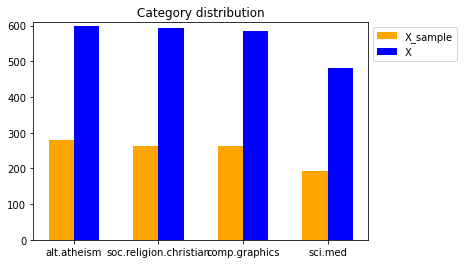

In [337]:
# Answer here
upper_bound = max(X.category_name.value_counts()) + 10

print(X.category_name.value_counts(),X_sample.category_name.value_counts())


x = np.arange(len(categories))
width = 0.3
plt.bar(x, X_sample.category_name.value_counts(), width, color='orange', label='X_sample')
plt.bar(x + width, X.category_name.value_counts(), width, color='blue', label='X')
plt.xticks(x + width / 2, categories)
plt.ylim([0, upper_bound])
plt.title('Category distribution')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

In [338]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [339]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.
**Answer here**

In [378]:
X_5_arr = X_counts[0:5, 0:100].toarray()[4]
X_5_arr

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [379]:
result = np.where(X_5_arr == 1)
result[0][1]

37

In [380]:
count_vect.get_feature_names()[result[0][1]]
## another 1 represent '01'

'01'

**exercise 10 end here~~** </br>
new section start!

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [428]:
import seaborn as sns
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:50]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:50]]
plot_z = X_counts[0:50, 0:50].toarray()

<IPython.core.display.Javascript object>


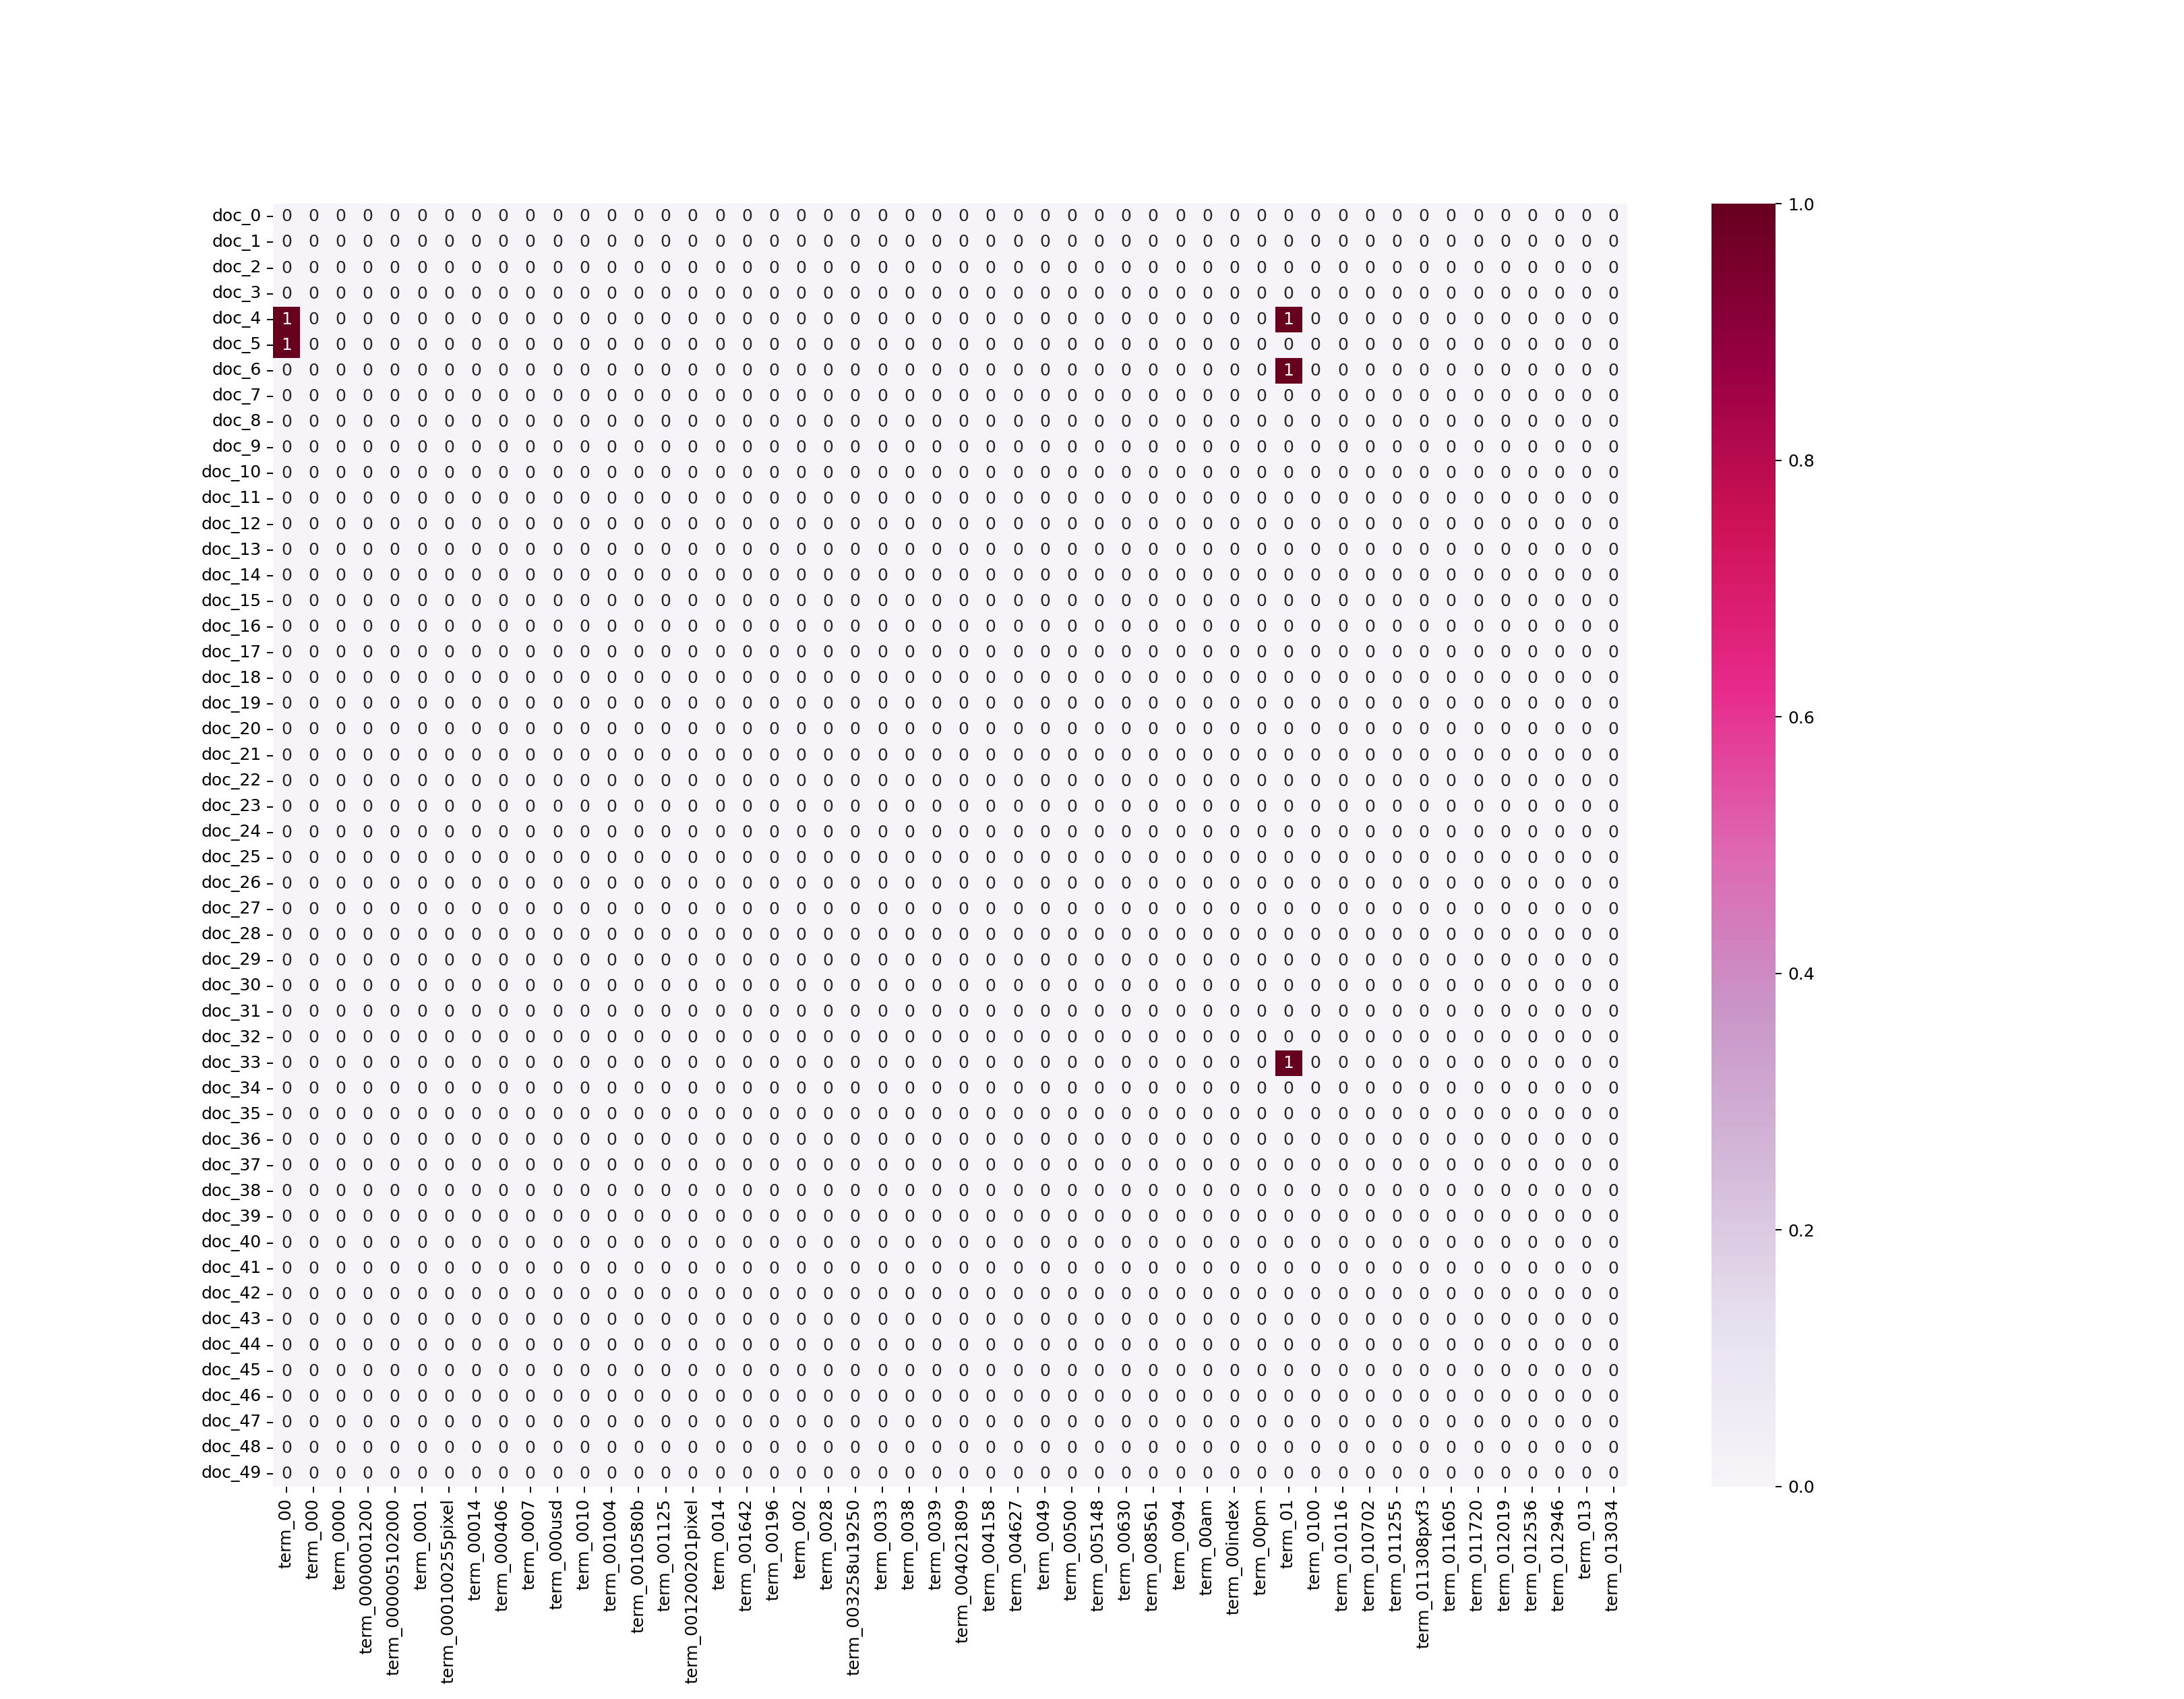

In [429]:
# Answer here
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(18, 14))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [388]:
# Answer here
X_3D = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_3D.shape

(2257, 3)

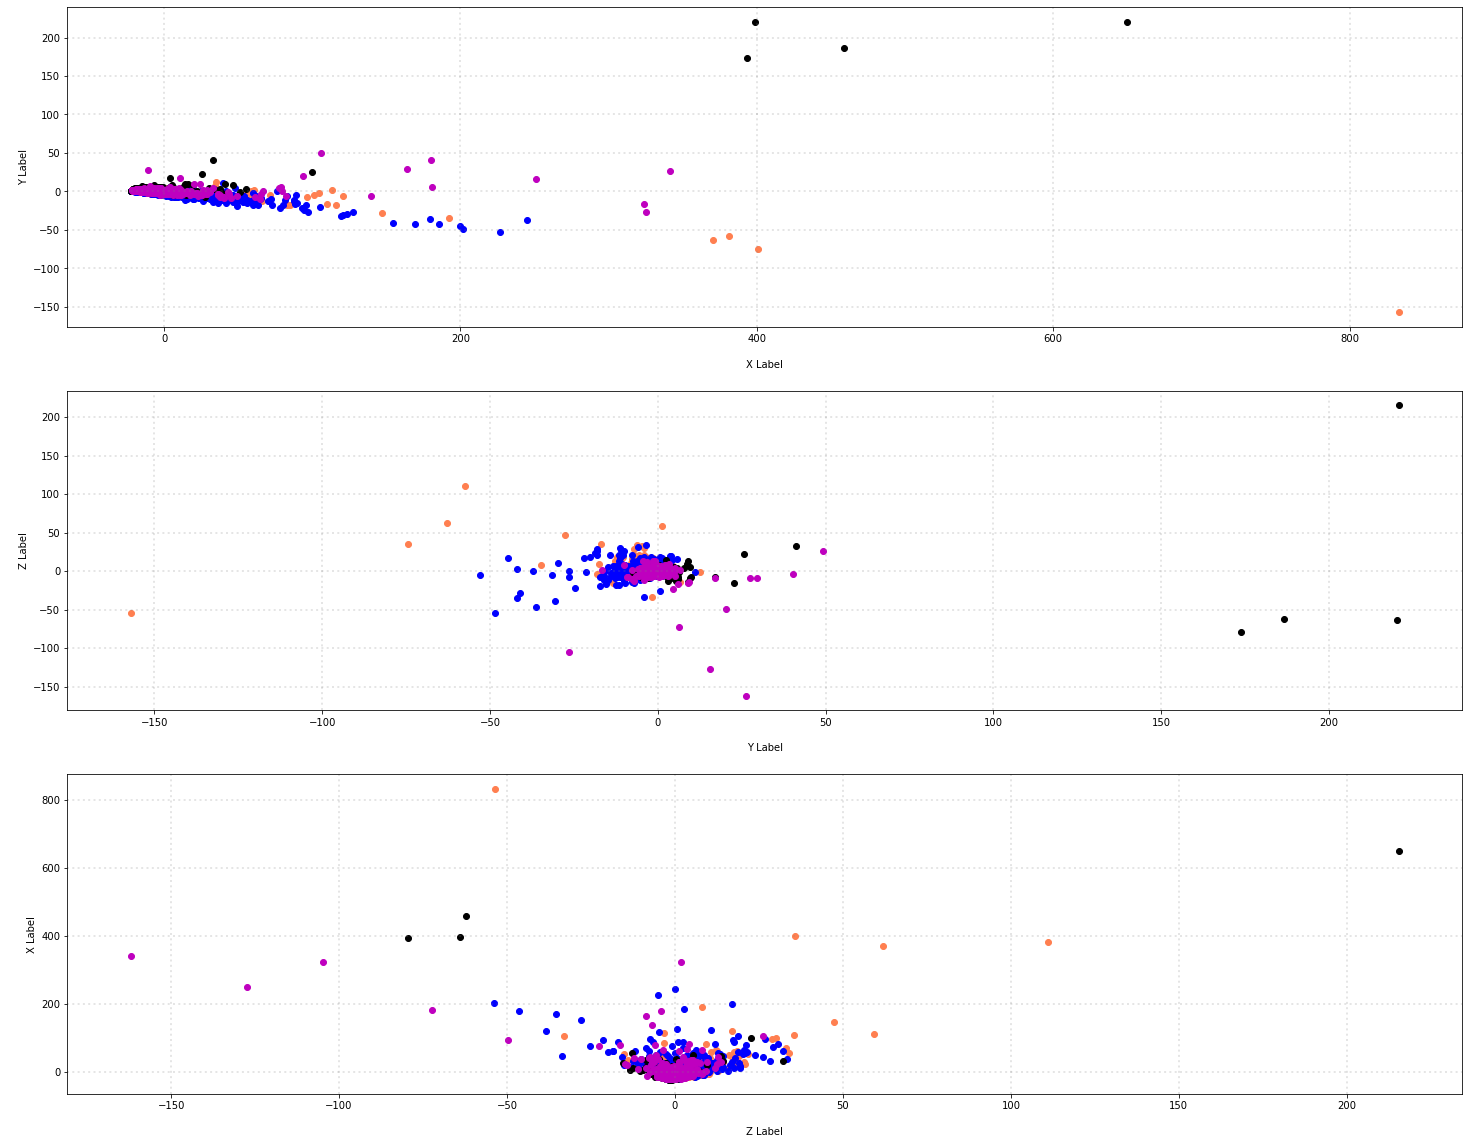

In [389]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,20))
ax = fig.subplots(3)
for i in range(3):
    for c, category in zip(col, categories):
        xs = X_3D[X['category_name'] == category].T[i%3]
        ys = X_3D[X['category_name'] == category].T[(i+1)%3]

        ax[i].scatter(xs, ys, c = c, marker='o')

    ax[i].grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    if i == 0:
        ax[i].set_xlabel('\nX Label')
        ax[i].set_ylabel('\nY Label')
    elif i == 1:
        ax[i].set_xlabel('\nY Label')
        ax[i].set_ylabel('\nZ Label')
    else:
        ax[i].set_xlabel('\nZ Label')
        ax[i].set_ylabel('\nX Label')
    
    ax[i].plot()

<IPython.core.display.Javascript object>


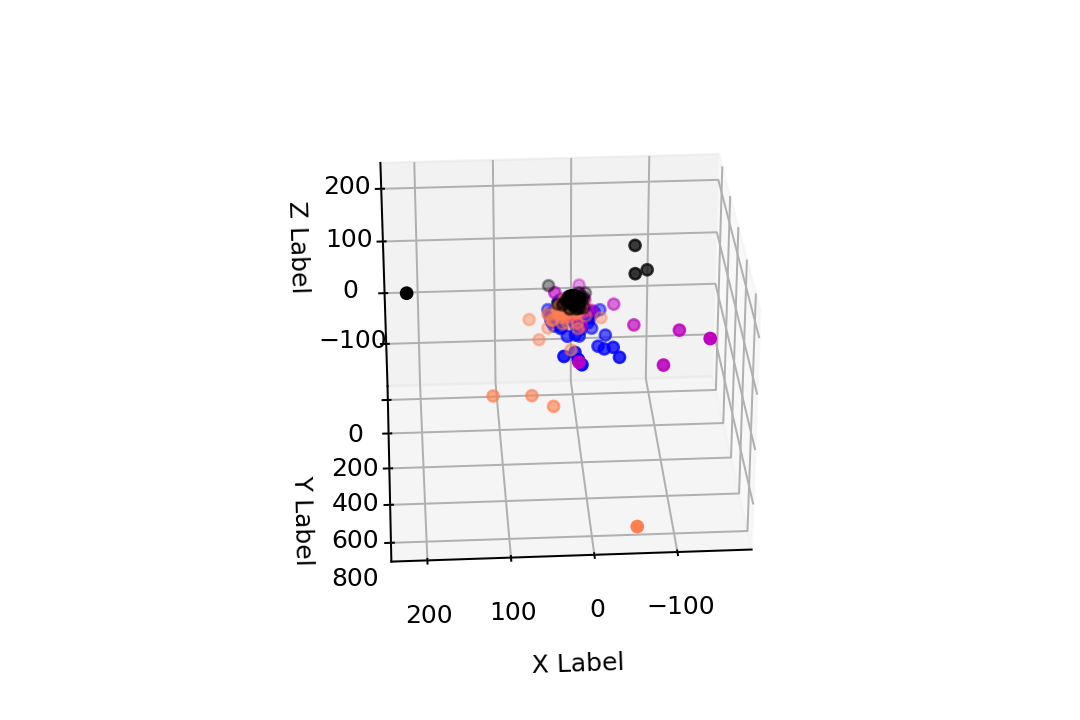

/var/folders/_7/rk2bxwhd5wv3rvl66tld1lvr0000gn/T/ipykernel_10144/103103419.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [396]:
# 建立 3D 圖形
fig = plt.figure()
ax = fig.gca(projection='3d')

# 產生 3D 座標資料
for c, category in zip(col, categories):
    xs = X_3D[X['category_name'] == category].T[2]
    ys = X_3D[X['category_name'] == category].T[0]
    zs = X_3D[X['category_name'] == category].T[1]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
    
# 繪製 3D 座標點

# 顯示圖例
x_line = np.linspace(0, 15, 1000)
y_line = np.linspace(0, 15, 1000)
z_line = np.linspace(0, 15, 1000)
ax.plot3D(x_line, y_line, z_line, 'gray')

# 顯示圖形
plt.show()

through the 3d graph, we can discover the data form a cone like format. Which means the datas gather in one zone and diverge to a particular direction.

### 5.5 Atrribute Transformation / Aggregation

In [179]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [400]:
import plotly.express as px


In [404]:
# data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar( x=count_vect.get_feature_names()[:300], y=np.log(term_frequencies[:300]))
fig.show()

In [399]:
data_canada

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
240,Canada,Americas,1952,68.750,14785584,11367.16112,CAN,124
241,Canada,Americas,1957,69.960,17010154,12489.95006,CAN,124
242,Canada,Americas,1962,71.300,18985849,13462.48555,CAN,124
243,Canada,Americas,1967,72.130,20819767,16076.58803,CAN,124
244,Canada,Americas,1972,72.880,22284500,18970.57086,CAN,124
245,Canada,Americas,1977,74.210,23796400,22090.88306,CAN,124
246,Canada,Americas,1982,75.760,25201900,22898.79214,CAN,124
247,Canada,Americas,1987,76.860,26549700,26626.51503,CAN,124
248,Canada,Americas,1992,77.950,28523502,26342.88426,CAN,124
249,Canada,Americas,1997,78.610,30305843,28954.92589,CAN,124


### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


**Answer here**
I want show only elements whose frequencies are larger than 400

In [180]:
y_lg400 = term_frequencies[term_frequencies>400]
#get all the frequencies larger than 400

# 1st get the list of indexes larger than 400
idx_lg400 = np.argwhere(term_frequencies>400)
idx_lg400 = np.transpose(idx_lg400)[0] #transform the list to 1D array

# filter the elements through the list of indexes
x_lg400 = np.take(count_vect.get_feature_names(), idx_lg400, 0)

/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [181]:
len(y_lg400)

180

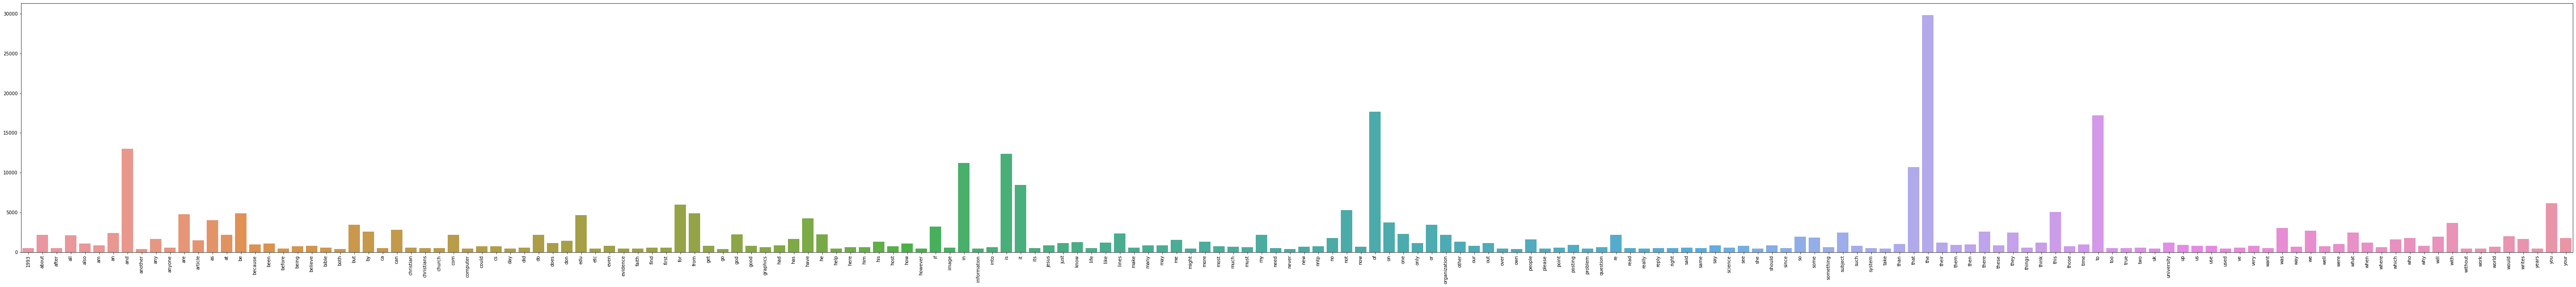

In [182]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=x_lg400, y=y_lg400)
g.set_xticklabels(x_lg400, rotation = 90);

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

**answers here**
only want to display data with frequency larger than 50
and only use the first 100 datas

In [183]:
#get first 100 data with the frequencies larger than 50
y_reduce = term_frequencies[term_frequencies>50][:100]

# 1st get the list of indexes larger than 400
idx_reduce = np.argwhere(term_frequencies>50)[:100]
idx_reduce = np.transpose(idx_reduce)[0] #transform the list to 1D array

# filter the elements through the list of indexes
x_reduce = np.take(count_vect.get_feature_names(), idx_reduce, 0)

/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [184]:
y_reduce

array([ 134,   92,   95,   59,  100,   62,  378,  105,  215,  236,   82,
        219,  239,  293,  278,  192,  184,  208,   83,  488,   61,  324,
        192,  142,  136,  268,  116,   85,  123,  101,  100,   79,  167,
        104,  101,   88,   78,   76,   54,   60,   55,  210,   86,   69,
         99,   70,  109,   65,   52,  124,  108,  161,   68,  226, 2148,
        248,  137,   56,   67,  303,  183,   95,   57,  130,  129,   71,
         53,   54,   62,  121,   93,   76,   95,  279,   86,   74,  148,
         65,  105,   89,  489,  315,  213,  105,  154,  208,  104,  147,
         52,   90, 2093,   91,   95,   62,   62,  147,   93,  114,  146,
       1090])

In [185]:
# sort frequency decending
y_sort = np.sort(y_reduce)[::-1]
sorted_indexes = np.argsort(y_reduce)[::-1]
x_sort = np.array(x_reduce)[sorted_indexes]

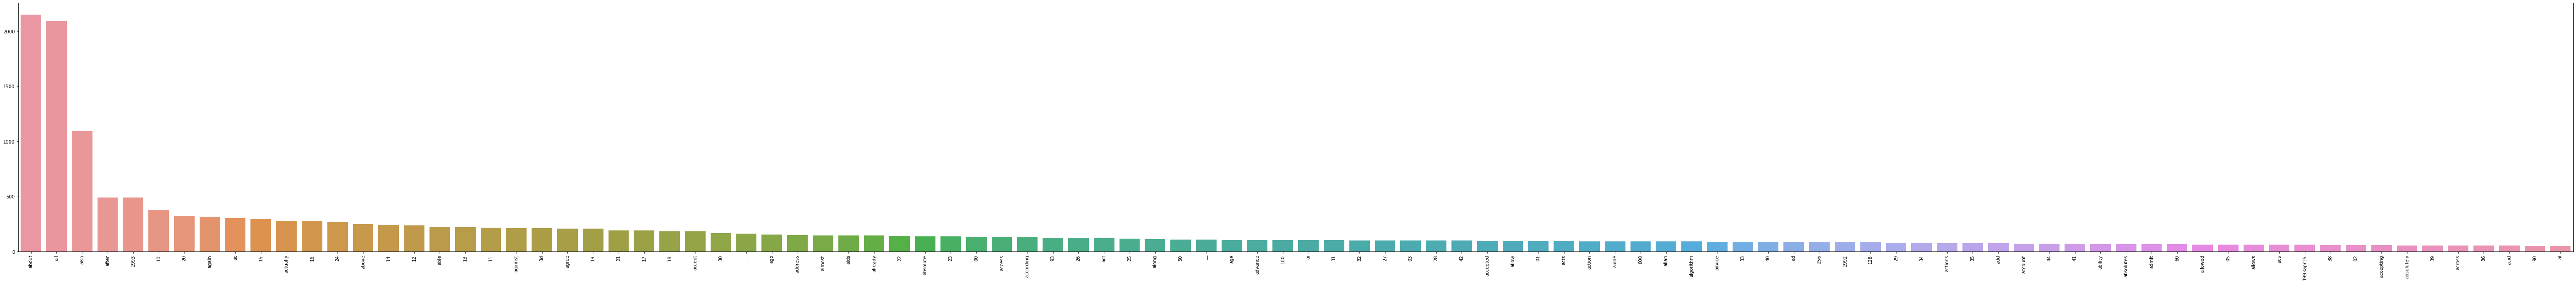

In [186]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=x_sort, y=y_sort)
g.set_xticklabels(x_sort, rotation = 90);

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [187]:
# Answer here
mlb.fit(X.category_name)
mlb.classes_

array(['alt.atheism', 'comp.graphics', 'sci.med',
       'soc.religion.christian'], dtype='<U22')

In [188]:
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

In [189]:
X[0:9]

,text,category,category_name,unigrams,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"




# Part 2.
## 2.Data Preparation

In [190]:
categories = ['negative','positive']

In [191]:
# read in txt file
#then convert into dict object 
directory = 'new_datas'
text = []
target_name = []
target=[]

In [192]:
for filename in os.listdir(directory):
    
    if filename not in ["readme.txt", ".DS_Store"]:
        with open(directory+"/"+filename, 'r', errors='replace') as f:
            tmp = f.readlines()
        #convert the read in data to similiar format of [twenty_train]
        for d in tmp:
            text.append(d.split("\t")[0])
            score = int(d.split("\t")[1].split("\t")[0])
            target.append(score)
            target_name.append(categories[score])


In [193]:
data = {
    "sentence":text,
    "target_name": target_name,
    "target": target
}        

In [194]:
data["sentence"][0:2]

['So there is no way for me to plug it in here in the US unless I go by a converter.',
 'Good case, Excellent value.']

In [195]:
len(data["sentence"])

3000

In [196]:
type(data["sentence"])

list

### 3.1 Converting Dictionary into Pandas Datafram

In [197]:
X = pd.DataFrame.from_records(dmh.format_rows_new(data["sentence"]), columns= ['text'])

In [198]:
X

,text
0,So there is no way for me to plug it in here i...
1,"Good case, Excellent value."
2,Great for the jawbone.
3,Tied to charger for conversations lasting more...
4,The mic is great.
...,...
2995,I just got bored watching Jessice Lange take h...
2996,"Unfortunately, any virtue in this film's produ..."
2997,"In a word, it is embarrassing."
2998,Exceptionally bad!


In [199]:
len(X)

3000

In [200]:
for t in X["text"][:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


### Adding Columns

In [201]:
X['category'] = data["target"]
X['category_name'] = data["target_name"]

In [202]:
X[0:10]

,text,category,category_name
0,So there is no way for me to plug it in here i...,0,negative
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negative
4,The mic is great.,1,positive
5,I have to jiggle the plug to get it to line up...,0,negative
6,If you have several dozen or several hundred c...,0,negative
7,If you are Razr owner...you must have this!,1,positive
8,"Needless to say, I wasted my money.",0,negative
9,What a waste of money and time!.,0,negative


### 3.2 Familiarizing yourself with the Data

In [203]:
# a simple query
X[0:10][["text", "category_name"]]

,text,category_name
0,So there is no way for me to plug it in here i...,negative
1,"Good case, Excellent value.",positive
2,Great for the jawbone.,positive
3,Tied to charger for conversations lasting more...,negative
4,The mic is great.,positive
5,I have to jiggle the plug to get it to line up...,negative
6,If you have several dozen or several hundred c...,negative
7,If you are Razr owner...you must have this!,positive
8,"Needless to say, I wasted my money.",negative
9,What a waste of money and time!.,negative


#### Let's query the last 10 records

In [204]:
X[-10:]

,text,category,category_name
2990,"The opening sequence of this gem is a classic,...",1,positive
2991,Fans of the genre will be in heaven.,1,positive
2992,Lange had become a great actress.,1,positive
2993,It looked like a wonderful story.,1,positive
2994,I never walked out of a movie faster.,0,negative
2995,I just got bored watching Jessice Lange take h...,0,negative
2996,"Unfortunately, any virtue in this film's produ...",0,negative
2997,"In a word, it is embarrassing.",0,negative
2998,Exceptionally bad!,0,negative
2999,All in all its an insult to one's intelligence...,0,negative


In [205]:
# using loc (by position)
X.iloc[::10, 0:2][0:10]

,text,category
0,So there is no way for me to plug it in here i...,0
10,And the sound quality is great.,1
20,I went on Motorola's website and followed all ...,0
30,"This is a simple little phone to use, but the ...",0
40,"It has a great camera thats 2MP, and the pics ...",1
50,Not loud enough and doesn't turn on like it sh...,0
60,Essentially you can forget Microsoft's tech su...,0
70,Mic Doesn't work.,0
80,I wear it everyday and it holds up very well.,1
90,For a product that costs as much as this one d...,0


In [206]:
# using loc (by label)
X.loc[::10, 'text'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: text, dtype: object

In [207]:
# standard query (Cannot simultaneously select rows and columns)
X[::10][0:10]

,text,category,category_name
0,So there is no way for me to plug it in here i...,0,negative
10,And the sound quality is great.,1,positive
20,I went on Motorola's website and followed all ...,0,negative
30,"This is a simple little phone to use, but the ...",0,negative
40,"It has a great camera thats 2MP, and the pics ...",1,positive
50,Not loud enough and doesn't turn on like it sh...,0,negative
60,Essentially you can forget Microsoft's tech su...,0,negative
70,Mic Doesn't work.,0,negative
80,I wear it everyday and it holds up very well.,1,positive
90,For a product that costs as much as this one d...,0,negative


In [208]:
X.loc[lambda f: f.category_name == 'negative'].iloc[::10, :][0:5]

,text,category,category_name
0,So there is no way for me to plug it in here i...,0,negative
20,I went on Motorola's website and followed all ...,0,negative
37,Poor Talk Time Performance.,0,negative
60,Essentially you can forget Microsoft's tech su...,0,negative
83,The battery runs down quickly.,0,negative


## 4. Data Mining using Pandas
### 4.1 Missing Values

In [209]:
X.isnull()

,text,category,category_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2995,False,False,False
2996,False,False,False
2997,False,False,False
2998,False,False,False


In [210]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [211]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [212]:
dummy_series

text        dummy_record
category               1
dtype: object

In [213]:
result_with_series = X.append(dummy_series, ignore_index=True)

In [214]:
# check if the records was commited into result
len(result_with_series)

3001

In [215]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [216]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [217]:
X = X.append(dummy_dict, ignore_index=True)

In [218]:
len(X)

3001

In [219]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [220]:
X.dropna(inplace=True)

In [221]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [222]:
len(X)

3000

### 4.2 Dealing with Duplicate Data

In [223]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [224]:
sum(X.duplicated())

17

In [225]:
X.drop_duplicates(keep=False, inplace=True)

In [226]:
len(X)

2966

## 5.  Data Preprocessing
### 5.1 Sampling

In [227]:
X_sample = X.sample(n=1000)

In [228]:
len(X_sample)

1000

In [229]:
X_sample[0:4]

,text,category,category_name
516,I am very impressed with the job that Motorola...,1,positive
2692,This is one of Peter Watkins most accessible f...,1,positive
1497,"This was my first crawfish experience, and it ...",1,positive
1041,There is not a deal good enough that would dra...,0,negative


negative    1486
positive    1480
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

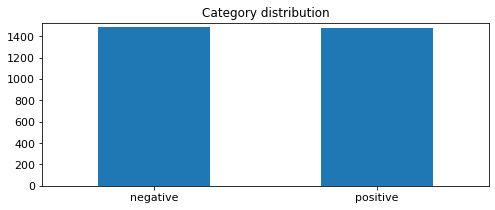

In [230]:
upper_bound = max(X.category_name.value_counts()) + 40
print(X.category_name.value_counts())

# plot barchart for X_sample
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

negative    513
positive    487
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

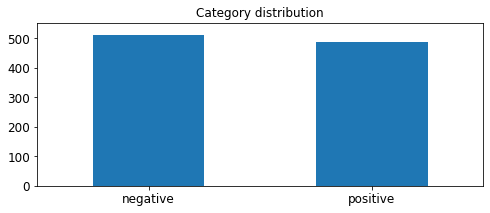

In [231]:
upper_bound = max(X_sample.category_name.value_counts()) + 40

print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

negative    1486
positive    1480
Name: category_name, dtype: int64 negative    513
positive    487
Name: category_name, dtype: int64


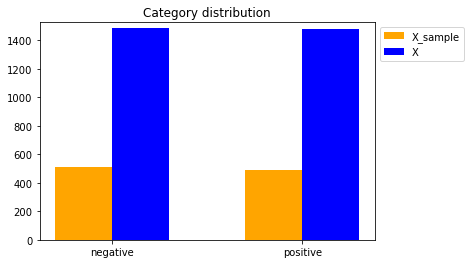

In [232]:
# Answer here
upper_bound = max(X.category_name.value_counts()) + 40

print(X.category_name.value_counts(),X_sample.category_name.value_counts())




x = np.arange(len(categories))
width = 0.3
plt.bar(x, X_sample.category_name.value_counts(), width, color='orange', label='X_sample')
plt.bar(x + width, X.category_name.value_counts(), width, color='blue', label='X')
plt.xticks(x + width / 2, categories)
plt.ylim([0, upper_bound])
plt.title('Category distribution')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

### 5.2 Feature Creation

In [233]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [234]:
X[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [235]:
X[0:4]

,text,category,category_name,unigrams
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin..."


In [236]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### 5.3 Feature subset selection

In [237]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [238]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")


['hello', 'world']

In [239]:
analyze(" ".join(list(X[:1].text)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [240]:
X_counts.shape

(2966, 5153)

In [241]:
count_vect.get_feature_names()[0:10]

/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [242]:
X[0:5]

,text,category,category_name,unigrams
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,positive,"[The, mic, is, great, .]"


In [243]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [244]:
tmp = X_counts[0:5, 0:100].toarray()[3]
np.where(tmp == 1)

(array([45]),)

In [245]:
count_vect.get_feature_names()[0]

/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'00'

In [246]:
X.text[3]

'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!'

In [247]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [248]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]])

In [249]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [250]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[30:50]]

In [251]:
plot_z = X_counts[0:20, 30:50].toarray()

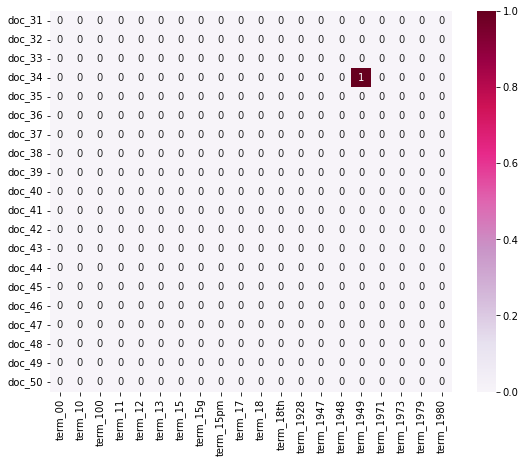

In [252]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [253]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [254]:
X_reduced.shape

(2966, 2)

In [255]:
categories 

['negative', 'positive']

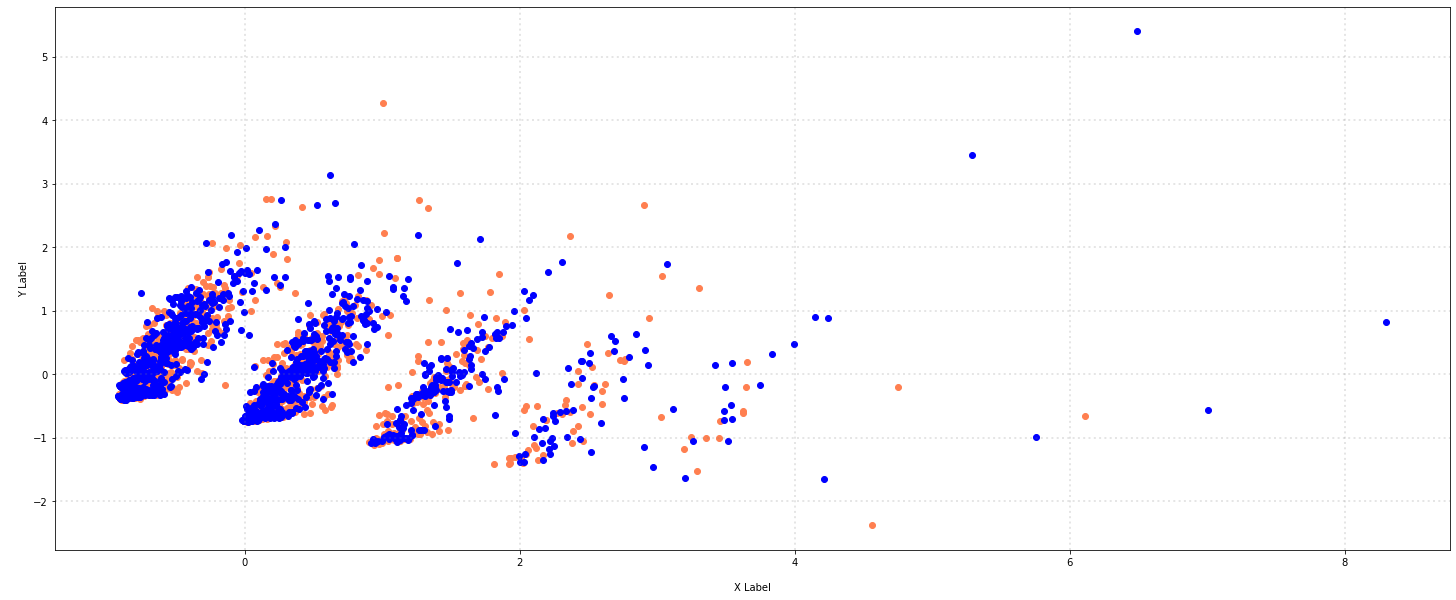

In [256]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### 5.5 Atrribute Transformation / Aggregation

In [257]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [258]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [259]:
term_frequencies[:20]

array([ 1, 34,  3,  2,  4,  3,  3,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1])

/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


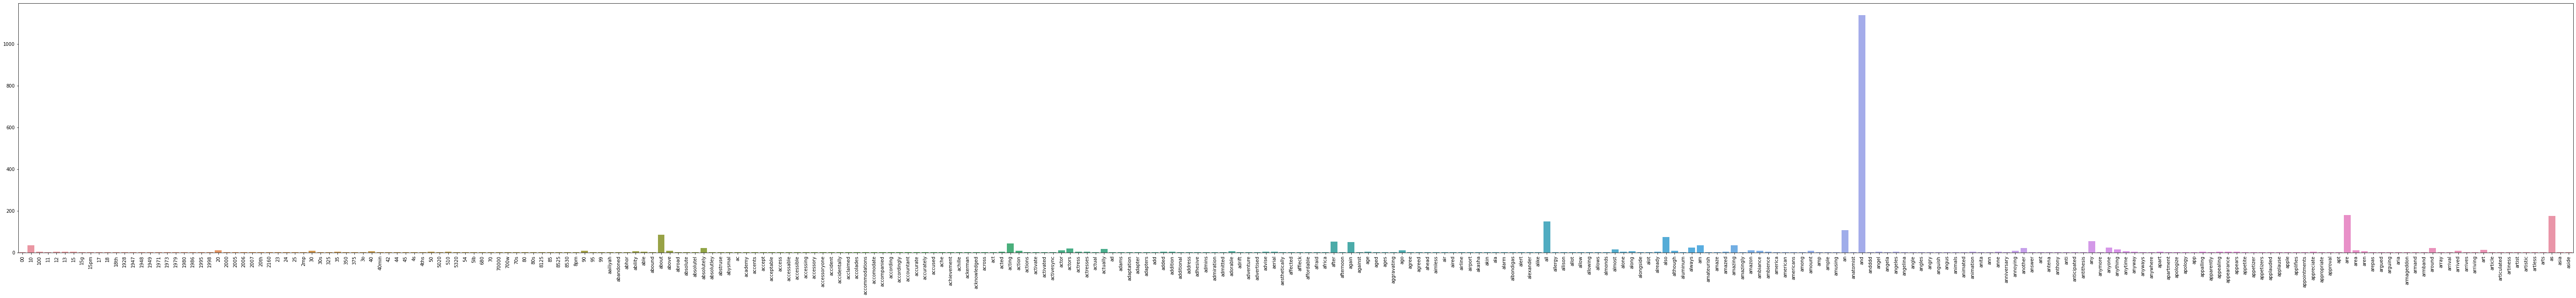

In [260]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [261]:
term_frequencies_log = [math.log(i) for i in term_frequencies]

/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


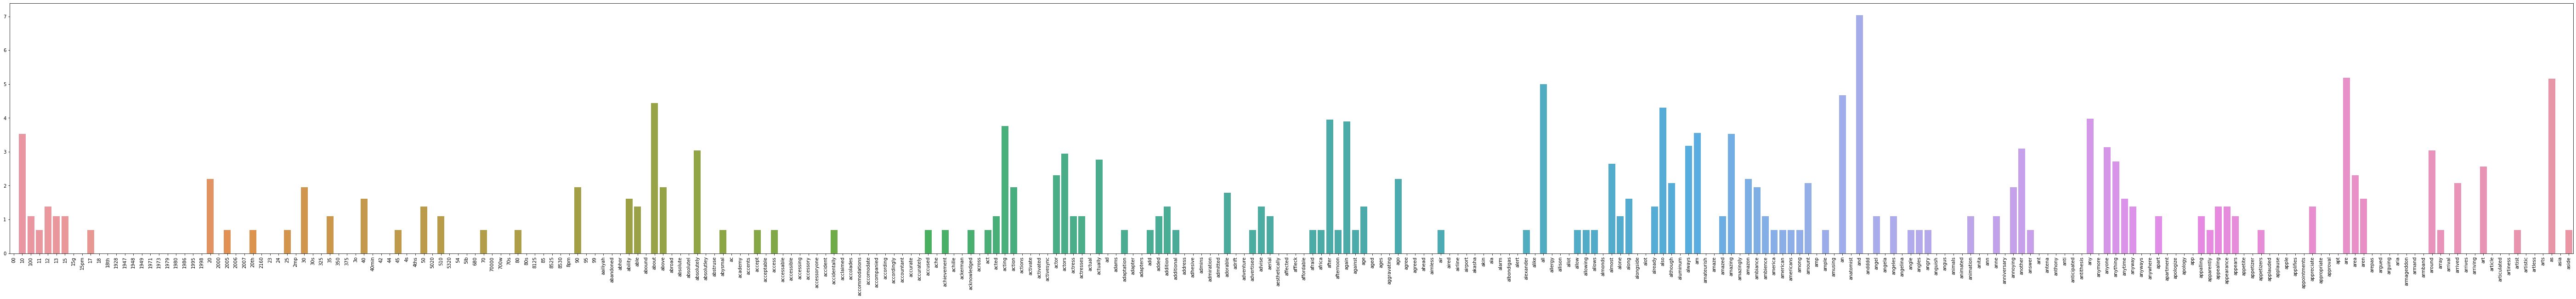

In [262]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [263]:
mlb = preprocessing.LabelBinarizer()

In [264]:
mlb.fit(X.category)

LabelBinarizer()

In [265]:
mlb.classes_

array([0, 1])

In [266]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [267]:
X[0:9]

,text,category,category_name,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,positive,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,negative,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


# 6. Data Exploration

In [268]:
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [269]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [270]:

document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print

print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [271]:

cos_sim_count_1_2 = fig = px.histogram(comp_df, x='Words_clipped', template='plotly_white', title='Complain counts by length')
fig.update_xaxes(categoryorder='total descending', title='Number of words (clipped at 1000 words)').update_yaxes(title='Number of complaints')
fig.show()(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


## Part 3 of homework
### a. new data visualizations. 


I will show the top 100 frequenty used word a

In [417]:
y_top50 = np.sort(term_frequencies[:1000])[::-1][:50]
y_top50

array([1138,  201,  180,  175,  148,  148,  135,  106,  103,   85,   84,
         78,   78,   74,   71,   57,   53,   53,   52,   51,   49,   46,
         43,   35,   35,   34,   34,   34,   32,   30,   30,   24,   24,
         23,   23,   22,   21,   21,   21,   21,   21,   21,   20,   20,
         20,   19,   19,   19,   18,   18])

In [418]:
sorted_indexes = np.argsort(y_top50)[::-1][:100]
x_top50 = np.array(count_vect.get_feature_names())[sorted_indexes]
x_top50

array(['00', '000', '0000', '0000001200', '000005102000', '0001',
       '000100255pixel', '00014', '000406', '0007', '000usd', '001004',
       '0010', '0010580b', '001125', '001200201pixel', '0014', '001642',
       '00196', '002', '0028', '003258u19250', '0033', '0038', '0039',
       '004158', '004627', '004021809', '0049', '00500', '005148',
       '00630', '008561', '0094', '00am', '00index', '010116', '011255',
       '010702', '00pm', '0100', '01', '011308pxf3', '011605', '011720',
       '012946', '012019', '012536', '013', '013034'], dtype='<U80')

In [423]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='ori_data', x=x_top50, y=y_top50),
    go.Bar(name='log data', x=x_top50, y=np.log(y_top50))
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [416]:
fig = px.bar( x=x_top100, y=np.log(y_top100))
fig.show()

### b. TF-IDF features
Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .

In [283]:
type(X.text[0])


str

In [290]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X.text).toarray()
word=tfidf.get_feature_names()

In [293]:
X_tfidf[:5][:100]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [295]:
X_tfidf.shape

(2966, 5153)

In [296]:
X_counts.shape

(2966, 5153)

In [298]:
X[:5]

,text,category,category_name,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,positive,"[The, mic, is, great, .]",[1]


###  simple Naive Bayes classifier 
Use both the TF-IDF features and word frequency features to build two seperate classifiers.

**countvector model**

In [306]:
 X_train, X_test, y_train, y_test = train_test_split(    X_counts.toarray(), X.category, test_size=0.33, random_state=42)
    

In [307]:
NB_count_model = GaussianNB()
NB_count_model.fit(X_train, y_train)


GaussianNB()

In [308]:
y_pre = NB_count_model.predict(X_test)

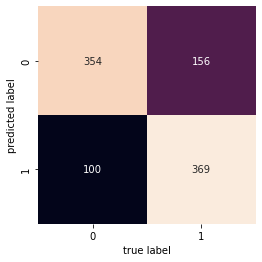

In [312]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pre)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');


**tfidf model**

In [313]:
 X_train, X_test, y_train, y_test = train_test_split(  X_tfidf, X.category, test_size=0.33, random_state=42)
    

In [315]:
NB_tfidf_model = GaussianNB()
NB_tfidf_model.fit(X_train, y_train)

GaussianNB()

In [317]:
y_pre = NB_count_model.predict(X_test)

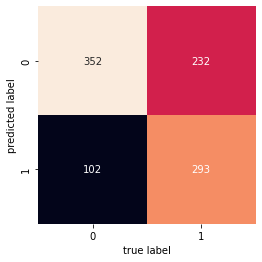

In [318]:
mat = confusion_matrix(y_test, y_pre)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');